# Predicting Diabetes Patient Readmission
Sheng Weng edit by mahdi akbari zarkesh

# Background
It was reported that in 2011 more than 3.3 million patients were readmitted in the US within 30 days of being discharged, and they were associated with about $41 billion in hospital costs. The need for readmission indicates that inadequate care was provided to the patient at the time of first admission. The readmission rate has become an important metric measuring the overall quality of a hospital.

Diabetes is the 7th leading cause of death and affects about 23.6 million people in the US. 1.4 million Americans are diagnosed with diabetes every year. Hospital readmission being a major concern in diabetes care, over 250 million dollars was spent on treatment of readmitted diabetic patients in 2011. Early identification of patients facing a high risk of readmission can enable healthcare providers to conduct additional investigations and possibly prevent future readmissions.

In this project, I build a machine learning classifier model to predict diabetes patients with high risk of readmission. Note that higher sensitivity (recall) is more desirable for hospitals because it is more crucial to correctly identify "high risk" patients who are likely to be readmitted than identifying "low risk" patients.



# Dataset Description
The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes 50 features representing 101766 diabetes patients and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria:

- It is an inpatient encounter (a hospital admission).
- It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
- The length of stay was at least 1 day and at most 14 days.
- Laboratory tests were performed during the encounter.
- Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

Source: UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008 


**VARIABLE** : DESCRIPTION
* **Encounter ID** :	Unique identifier of an encounter
* **Patient number** :	Unique identifier of a patient
* **Race	Values** : Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	: Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight** :	Weight in pounds
* **Admission type** : Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition** :	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source** :	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital** :	Integer number of days between admission and discharge
* **Payer code** :	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty** :	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures** :	Number of lab tests performed during the encounter
* **Number of procedures** :  Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications** : Number of distinct generic names administered during the encounter
* **Number of outpatient visits** : Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits** :	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits** :	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1** :	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2** :	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** : Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses** :	Number of diagnoses entered to the system 0%
* **Glucose serum test result** :	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result** :	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	: Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications** :	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted** :	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

### Overview of Dataset

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
# read the file and create a pandas dataframe
data = pd.read_csv('diabetic_data.csv')

In [7]:
# check the dimensions of the data
data.shape

(101766, 50)

In [8]:
# take a first look at the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
# first 5 rows of data
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### The Response Variable: 'readmitted'

Text(0, 0.5, 'Count')

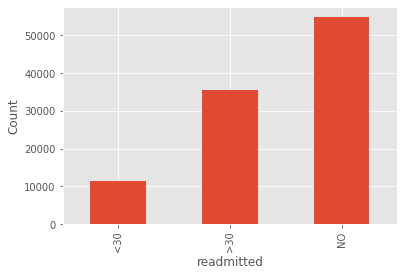

In [10]:
# the response variable 'readmitted' in the original dataset contains three categories.
# 11% of patients were readmitted within 30 days (<30)
# 35% of patients were readmitted after 30 days (>30)
# 54% of patients were never readmitted (NO)
data.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
# recode the response variable so that it becomes a binary classification task.
# '0' means no readmission
# '1' means readmission no matter how many days after being discharged
data['readmitted'] = pd.Series([0 if val == 'NO' else 1 for val in data['readmitted']])
data_origin = data

Text(0, 0.5, 'Count')

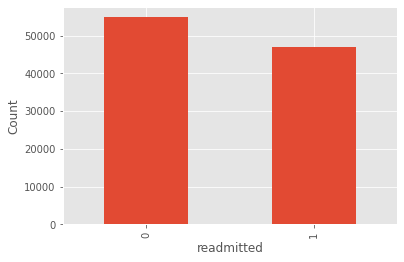

In [12]:
# plot 'readmitted' again to see the change
data.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

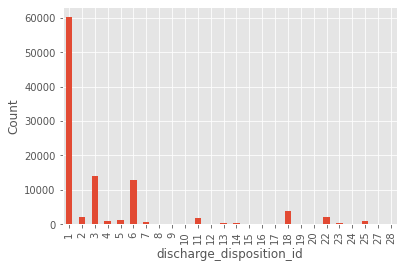

In [13]:
# the response variable 'discharge_disposition_id' in the original dataset contains 29 categories.
# now show resualt
data.groupby('discharge_disposition_id').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

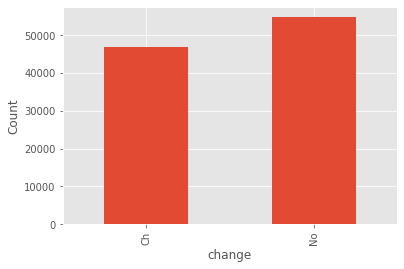

In [14]:
# the response variable 'discharge_disposition_id' in the original dataset contains 29 categories.
# now show resualt
data.groupby('change').size().plot(kind='bar')
plt.ylabel('Count')

# Feature Engineering and EDA
Explore data analysis on each feature and decide how to deal with them.

In [0]:
# remove irrelevant features
data.drop(['encounter_id','patient_nbr', 'payer_code'], axis=1, inplace=True)

In [16]:
# check NA in 'weight'
data[data['weight'] == '?'].shape[0] * 1.0 / data.shape[0]

0.9685847925633315

In [17]:
# check NA in 'medical_specialty'
data[data['medical_specialty'] == '?'].shape[0] * 1.0 / data.shape[0]


0.49082208203132677

In [0]:
# remove 'weight' and 'medical_specialty' because it's hard to do imputation on them
data.drop(['weight', 'medical_specialty'], axis=1, inplace=True)

In [0]:
# remove rows that have NA in 'race', 'diag_1', 'diag_2', or 'diag_3'
# remove rows that have invalid values in 'gender'
data = data[data['race'] != '?']
data = data[data['diag_1'] != '?']
data = data[data['diag_2'] != '?']
data = data[data['diag_3'] != '?']
data = data[data['gender'] != 'Unknown/Invalid']

Text(0, 0.5, 'Count')

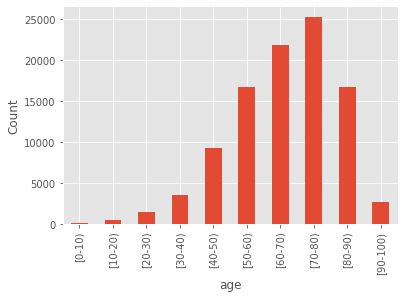

In [20]:
# check 'age' feature
data.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

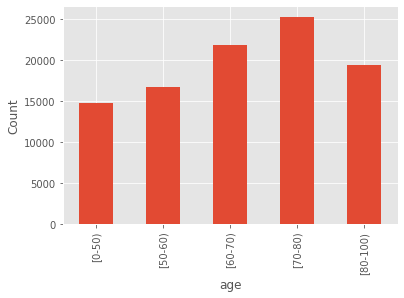

In [21]:
# Recategorize 'age' so that the population is more evenly distributed
data['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                         for val in data['age']], index=data.index)
data['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                         for val in data['age']], index=data.index)

data.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
# original 'discharge_disposition_id' contains 28 levels
# reduce 'discharge_disposition_id' levels into 2 categories
# discharge_disposition_id = 1 corresponds to 'Discharge Home'
data['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Other discharge' 
                                              for val in data['discharge_disposition_id']], index=data.index)

In [0]:
# original 'admission_source_id' contains 25 levels
# reduce 'admission_source_id' into 3 categories
data['admission_source_id'] = pd.Series(['Emergency Room' if val == 7 else 'Referral' if val == 1 else 'Other source' 
                                              for val in data['admission_source_id']], index=data.index)

In [0]:
# original 'admission_type_id' contains 8 levels
# reduce 'admission_type_id' into 2 categories
data['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other type' 
                                              for val in data['admission_type_id']], index=data.index)

23 features represent different medications, should we use them all in the model? 

How to deal with 'diag_1', 'diag_2', and 'diag_3'? 

Based on the results found in Reference[1], we know that:
- The statistical model suggests that the relationship between the probability of readmission and the HbA1c measurement depends on the **primary diagnosis**. 

- The only medication that varied significantly across the patients was the delivery of **insulin**, while other medications remained common among all the patients.

- It may not be surprising that the attention given to diabetes care in individuals with admitting diagnoses of circulatory or respiratory diseases may have been less than those with a **primary diagnosis of diabetes mellitus**. 

- Greater attention to diabetes care during the hospitalization for these high-risk individuals may have a significant impact on readmission.

- The primary, secondary, and third medical diagnoses are marked by the ICD9 codes. 

- ICD9 code for diabetes: 250.xx

Text(0, 0.5, 'Count')

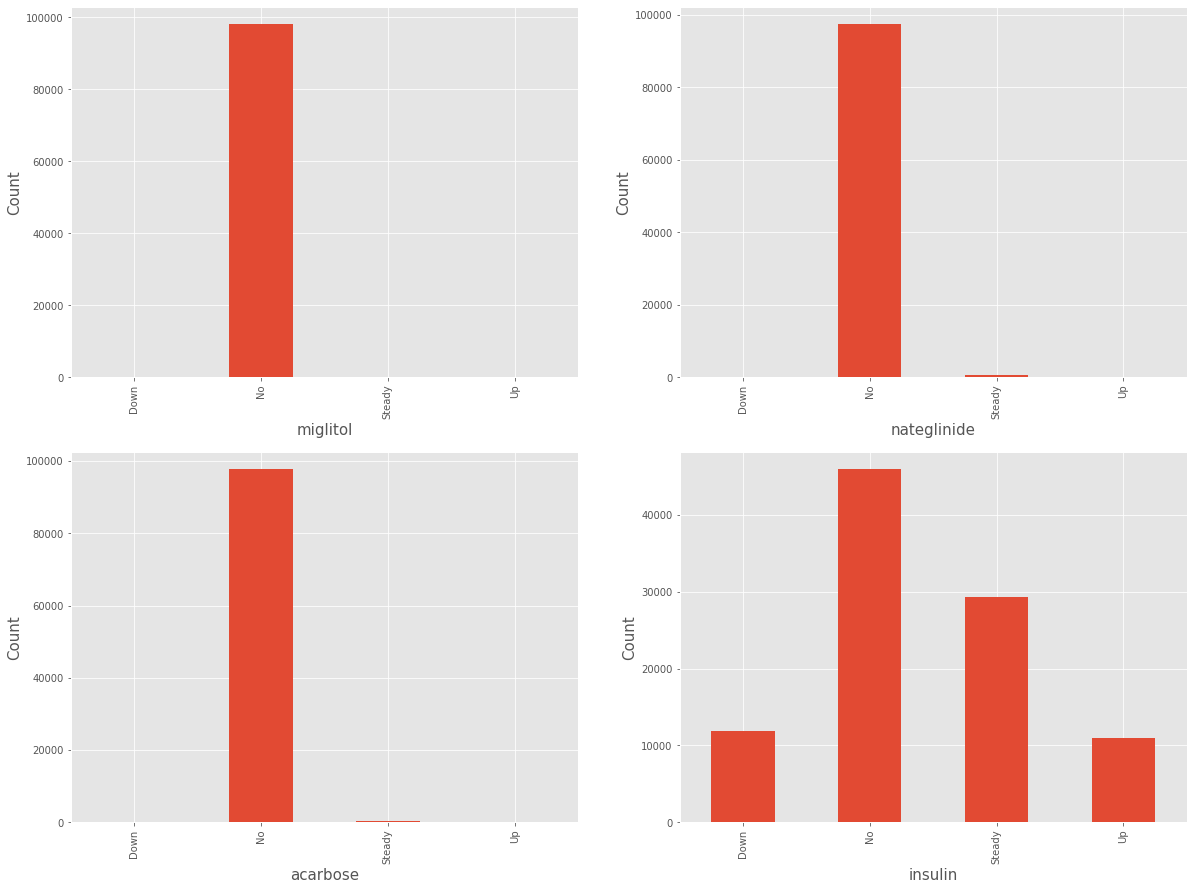

In [25]:
# compare diabetes medications 'miglitol', 'nateglinide' and 'acarbose' with 'insulin', as an example
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(221)
ax1 = data.groupby('miglitol').size().plot(kind='bar')
plt.xlabel('miglitol', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax2 = fig.add_subplot(222)
ax2 = data.groupby('nateglinide').size().plot(kind='bar')
plt.xlabel('nateglinide', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax3 = fig.add_subplot(223)
ax3 = data.groupby('acarbose').size().plot(kind='bar')
plt.xlabel('acarbose', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax4 = fig.add_subplot(224)
ax4 = data.groupby('insulin').size().plot(kind='bar')
plt.xlabel('insulin', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [0]:
# keep only 'insulin' and remove the other 22 diabetes medications
data.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

In [0]:
# denote 'diag_1' as '1' if it relates to diabetes and '0' if it's not
# remove 'diag_2' and 'diag_3'
data['diag_1'] = pd.Series([1 if val.startswith('250') else 0 for val in data['diag_1']], index=data.index)
data.drop(['diag_2', 'diag_3'], axis=1, inplace=True)

In [28]:
data.shape

(98052, 21)

In [29]:
# we end up with 98052 rows, 20 features, and one response variable 'readmitted' 
list(data.columns.values)

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

# Data Preprocessing

In [0]:
# one-hot-encoding on categorical features
# convert nominal values to dummy values
# make age group
data['age'] = pd.Series([25 if val == '[0-50)' else 55 if val == '[50-60)' else 65 if val == '[60-70)' else 75 if val == '[70-80)' else 90 for val in data['age']], index=data.index)

df_race = pd.get_dummies(data['race'])
df_gender = pd.get_dummies(data['gender'])
df_max_glu_serum = pd.get_dummies(data['max_glu_serum'])
df_A1Cresult = pd.get_dummies(data['A1Cresult'])
df_insulin = pd.get_dummies(data['insulin'])
df_change = pd.get_dummies(data['change'])
df_diabetesMed = pd.get_dummies(data['diabetesMed'])
df_discharge_disposition_id = pd.get_dummies(data['discharge_disposition_id'])
df_admission_source_id = pd.get_dummies(data['admission_source_id'])
df_admission_type_id = pd.get_dummies(data['admission_type_id'])

data = pd.concat([data, df_race, df_gender, df_max_glu_serum, df_A1Cresult, 
                  df_insulin, df_change, df_diabetesMed, df_discharge_disposition_id, 
                  df_admission_source_id, df_admission_type_id], axis=1)
data.drop(['race', 'gender', 'max_glu_serum', 'A1Cresult', 'insulin', 'change', 
                  'diabetesMed', 'discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id'], axis=1, inplace=True)

In [31]:
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,readmitted,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,Male,>200,>300,None,Norm,>7,>8,None,Norm,Down,No,Steady,Up,Ch,No,No,Yes,Home,Other discharge,Emergency Room,Other source,Referral,Emergency,Other type
1,25,3,59,0,18,0,0,0,0,9,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0
2,25,2,11,5,13,2,0,1,0,6,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0
3,25,2,44,1,16,0,0,0,0,7,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0
4,25,1,51,0,8,0,0,0,0,5,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0
5,55,3,31,6,16,0,0,0,0,9,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1


In [0]:
# feature scaling, features are standardized to have zero mean and unit variance
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[feature_scale_cols])
data_scaler = scaler.transform(data[feature_scale_cols])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=data.index)
data.drop(feature_scale_cols, axis=1, inplace=True)
data = pd.concat([data, data_scaler_df], axis=1)

# Data Preparation Summary
1. Remove NA in 'race', 'gender', 'diag_1', 'diag_2', and 'diag_3'
2. Remove 29 features in total: 'encounter_id', 'patient_nbr', 'payer_code', 'weight', 'medical_specialty', 'diag_2', 'diag_3', and 22 features for medications, including 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', and 'metformin-pioglitazone'
2. Recategorize 'age' feature
3. Reduce levels in 'discharge_disposition_id', 'admission_source_id', and 'admission_type_id'
4. One-hot-encode on categorical data
5. Square root transform on right skewed count data
6. Apply feature standardizing on numerical data

# Feature Importance
Evaluate the importance of different features by using emsemble method.

In [0]:
# create X (features) and y (response)
X = data.drop(['readmitted'], axis=1)
y = data['readmitted']

In [0]:
# split X and y into cross-validation (85%) and testing (15%) data sets
from sklearn.model_selection import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.15)

Top 10 features are: 
num_lab_procedures
num_medications
time_in_hospital
age
number_diagnoses
num_procedures
number_inpatient
number_outpatient
number_emergency
Female


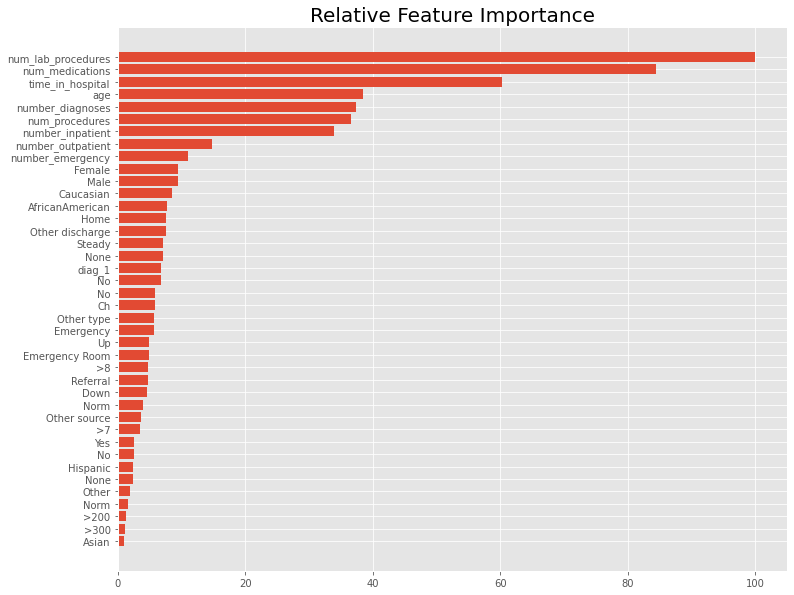

In [53]:
# fit Random Forest model to the cross-validation data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_cv, y_cv)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_cv.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print (feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

In [54]:
# make a smaller feature set which only contains the top 10 features
X_cv_top10 = X_cv[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses',
           'number_inpatient','number_outpatient','number_emergency','Female','age']]
X_test_top10 = X_test[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses',
           'number_inpatient','number_outpatient','number_emergency','Female','age']]
data.dtypes

age                     int64
diag_1                  int64
readmitted              int64
AfricanAmerican         uint8
Asian                   uint8
Caucasian               uint8
Hispanic                uint8
Other                   uint8
Female                  uint8
Male                    uint8
>200                    uint8
>300                    uint8
None                    uint8
Norm                    uint8
>7                      uint8
>8                      uint8
None                    uint8
Norm                    uint8
Down                    uint8
No                      uint8
Steady                  uint8
Up                      uint8
Ch                      uint8
No                      uint8
No                      uint8
Yes                     uint8
Home                    uint8
Other discharge         uint8
Emergency Room          uint8
Other source            uint8
Referral                uint8
Emergency               uint8
Other type              uint8
time_in_ho

# Model Selection
Compare the performance of three machine learning algorithms: Random Forest, Naive Bayes, and Logistic Regression.

Select the best model using 10-fold cross validation. The metric that will be using is the accuracy of prediction.

In [0]:
from sklearn.model_selection import cross_val_score

In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
RF_score = cross_val_score(clf1, X_cv_top10, y_cv, cv=10, scoring='accuracy').mean()
RF_score

0.5893984075709607

In [39]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
NB_score = cross_val_score(clf2, X_cv_top10, y_cv, cv=10, scoring='accuracy').mean()
NB_score

0.5892709345949001

In [40]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
LR_score = cross_val_score(clf3, X_cv_top10, y_cv, cv=10, scoring='accuracy').mean()
LR_score

0.614410889658734

Text(0, 0.5, 'Cross-Validated Accuracy')

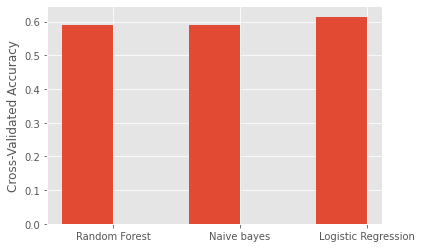

In [41]:
# plot and compare the scores
# LR outperforms the other two a little bit
x_axis = np.arange(3)
y_axis = [RF_score, NB_score, LR_score]
plt.bar(x_axis, y_axis, width=0.4)
plt.xticks(x_axis + 0.4/2., ('Random Forest', 'Naive bayes', 'Logistic Regression'))
plt.ylabel('Cross-Validated Accuracy')

In [42]:
#  DecisionTree
from sklearn.tree import DecisionTreeClassifier
clf4 = DecisionTreeClassifier(random_state=0,max_depth=32, criterion = "entropy", min_samples_split=12)
De_score = cross_val_score(clf4, X_cv_top10, y_cv, cv=10, scoring='accuracy').mean()
De_score

0.553728205098204

In [43]:
# k means
from sklearn.neighbors import KNeighborsClassifier
clf5 =  KNeighborsClassifier(12)
Kn_score = cross_val_score(clf5, X_cv_top10, y_cv, cv=10, scoring='accuracy').mean()
Kn_score

0.5888757784444858

In [59]:
# neural network keras 

import keras 
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

classifier = Sequential()
classifier.add(Dense(input_shape=(10,), units=6, kernel_initializer='random_uniform', activation='relu', ))
classifier.add(Dense(units=10, kernel_initializer='random_uniform', activation='relu'))
classifier.add(Dense(units=15, kernel_initializer='random_uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='random_uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics =['accuracy'])
classifier.fit(X_cv_top10, y_cv, batch_size=10 , epochs=3)

y_pred_nn = classifier.predict(X_test_top10)
y_pred_nn = [1 if y > 0.5 else 0 for y in y_pred_nn]


from sklearn.metrics import accuracy_score

acc1 = accuracy_score(y_test, y_pred_nn)

acc1

Epoch 1/3
8335/8335 [==============================] - 12s 1ms/step - loss: 0.6608 - accuracy: 0.6061
Epoch 2/3
8335/8335 [==============================] - 11s 1ms/step - loss: 0.6563 - accuracy: 0.6125
Epoch 3/3
8335/8335 [==============================] - 11s 1ms/step - loss: 0.6554 - accuracy: 0.6153


0.6231982594506391

### other solution for classtering this dataset
https://www.kaggle.com/iabhishekofficial/prediction-on-hospital-readmission/notebook link